In [19]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy import stats
import requests
import os
import csv
from pathlib import Path


In [20]:
# Study data files
aquifer_metadata_path = "datasets/archive/Edwards_Aquifer_annual_recharge_2000_2020.csv"
Residential_Water_data_path = "datasets/archive/Austin_Water_-_Residential_Water_Consumption.csv"

# Read the water data and the study results
aquifer_metadata = pd.read_csv(aquifer_metadata_path)
Residential_Water_data = pd.read_csv(Residential_Water_data_path)

# Combine the data 

Residential_Water_data['Year'] = Residential_Water_data ['Year Month'].str.split ('/').str [0]

Residential_Water_data['Year'] = Residential_Water_data['Year'].astype(int)
Residential_Water_data['Year'] = pd.to_numeric(Residential_Water_data['Year'])

Residential_Water_data['Total Gallons'] = Residential_Water_data['Total Gallons'].astype(int)

# Combine the data into a single DataFrame

water_complete_complete = (pd.merge(aquifer_metadata, Residential_Water_data, how="inner", on=["Year"]))
water_complete_complete = water_complete_complete.drop(['Year Month'], axis=1)

# Display the data table for preview
water_complete_complete.head()

,Year,Basin_1,Basin_2,Basin_3,Basin_4,Basin_5,Basin_6,Basin_7,Basin_9,Total,Postal Code,Customer Class,Total Gallons
0,2012,78.3,82.6,8.9,14.4,41.6,3.9,32.2,51.6,313.5,78613,Irrigation - Multi-Family,11000
1,2012,78.3,82.6,8.9,14.4,41.6,3.9,32.2,51.6,313.5,78613,Multi-Family,23000
2,2012,78.3,82.6,8.9,14.4,41.6,3.9,32.2,51.6,313.5,78617,Residential,19840800
3,2012,78.3,82.6,8.9,14.4,41.6,3.9,32.2,51.6,313.5,78617,Multi-Family,2477000
4,2012,78.3,82.6,8.9,14.4,41.6,3.9,32.2,51.6,313.5,78652,Irrigation - Residential,38500


In [13]:
aquifer_metadata.rename({'Basin_1':'Basin 1','Basin_2':'Basin 2', 'Basin_3':'Basin 3', 'Basin_4':'Basin 4', 'Basin_5': 'Basin 5',
'Basin_6':'Basin 6', 'Basin_7': 'Basin 7', 'Basin_9': 'Basin 9'}, axis = 1, inplace = True)
aquifer_metadata.head(22)

,Year,Basin 1,Basin 2,Basin 3,Basin 4,Basin 5,Basin 6,Basin 7,Basin 9,Total
0,2000,238.4,123.0,33.10,55.20,53.4,28.60,48.6,34.1,614.5
1,2001,297.5,126.7,66.20,124.10,90.0,101.50,173.7,89.7,1069.4
2,2002,83.6,207.3,70.60,345.20,93.7,175.50,447.8,150.0,1573.7
3,2003,149.8,112.2,31.70,67.40,86.8,56.20,105.0,59.9,669.0
4,2004,481.9,424.5,116.00,343.90,95.5,213.40,315.0,185.8,2176.1
5,2005,105.5,147.2,50.10,79.10,82.8,84.80,140.4,74.1,764.0
6,2006,45.5,60.2,9.00,5.00,47.7,5.10,11.2,17.9,201.6
7,2007,471.8,474.4,104.00,406.40,75.2,227.60,306.1,96.9,2162.3
8,2008,48.2,44.5,5.90,9.80,53.6,9.60,22.8,18.5,212.9
9,2009,58.5,30.3,1.80,13.50,45.6,7.30,26.4,27.5,211.0


In [4]:
water_complete_complete['Year'].count()

16820

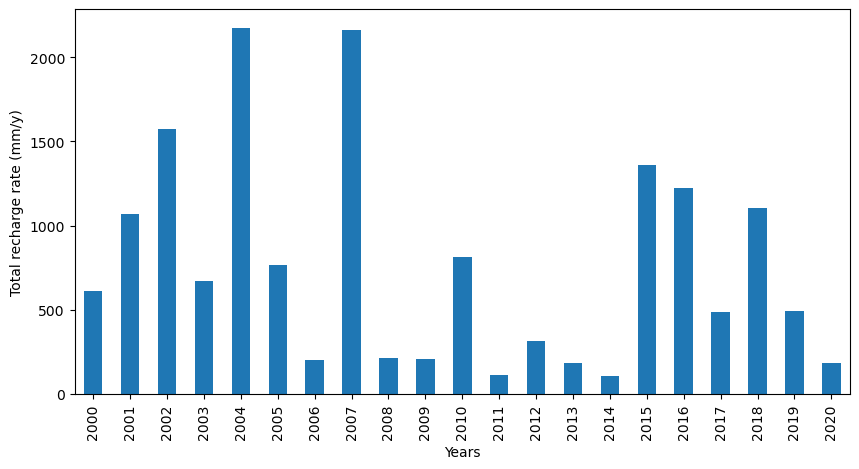

In [10]:
basindf = aquifer_metadata.groupby('Year')['Total'].sum()

# Create a bar plot using the drug_regimen_counts series
basindf.plot(kind='bar', figsize=(10,5))

# Set the title and axis labels
plt.xlabel('Years')
plt.ylabel('Total recharge rate (mm/y)')

# Display the plot
plt.show()

In [21]:
NinoNina = Path('./Resources/Nino_Nina_Timeline.xlsx')
NinoNina_df = pd.read_excel(NinoNina)
NinoNina_filtered_date_df=NinoNina_df.loc[NinoNina_df['Year']>=2000]
NinoNina_filtered_date_df

,Year,Effect,Strength
48,2000,Nina,Weak
49,2001,None,NaN
50,2002,Nino,Moderate
51,2003,None,NaN
52,2004,Nino,Weak
53,2005,Nina,Weak
54,2006,Nino,Weak
55,2007,Nina,Strong
56,2008,Nina,Weak
57,2009,Nino,Moderate


In [6]:
water_complete_complete.dtypes

Year                int64
Basin_1           float64
Basin_2           float64
Basin_3           float64
Basin_4           float64
Basin_5           float64
Basin_6           float64
Basin_7           float64
Basin_9           float64
Total             float64
Postal Code         int64
Customer Class     object
Total Gallons       int32
dtype: object

In [7]:
summary_df2 = water_complete_complete.groupby('Customer Class')['Total Gallons'].agg(['mean', 'median', 'var', 'std','sem'])
summary_df2

,mean,median,var,std,sem
Customer Class,,,,,
Irrigation - Multi-Family,1.853053e+06,997750.0,5.264581e+12,2.294467e+06,36415.531466
Irrigation - Residential,9.377354e+04,22950.0,5.869516e+10,2.422708e+05,3960.493009
Multi-Family,1.694487e+07,13057200.0,2.870086e+14,1.694133e+07,255168.252711
Residential,2.735767e+07,20781150.0,5.720986e+14,2.391858e+07,348888.380039


In [22]:
Custumer_class = water_complete_complete.groupby('Customer Class')['Total Gallons'].mean()

Custumer_class.head()


Customer Class
Irrigation - Multi-Family    1.853053e+06
Irrigation - Residential     9.377354e+04
Multi-Family                 1.694487e+07
Residential                  2.735767e+07
Name: Total Gallons, dtype: float64

In [24]:
Custumer_class = water_complete_complete.groupby(['Year', 'Customer Class'])['Total Gallons'].sum()
Custumer_class.head()

Year  Customer Class           
2012  Irrigation - Multi-Family      764143300
      Irrigation - Residential        46482000
      Multi-Family                  8235931400
      Residential                  16623202300
2013  Irrigation - Multi-Family      723146500
Name: Total Gallons, dtype: int64

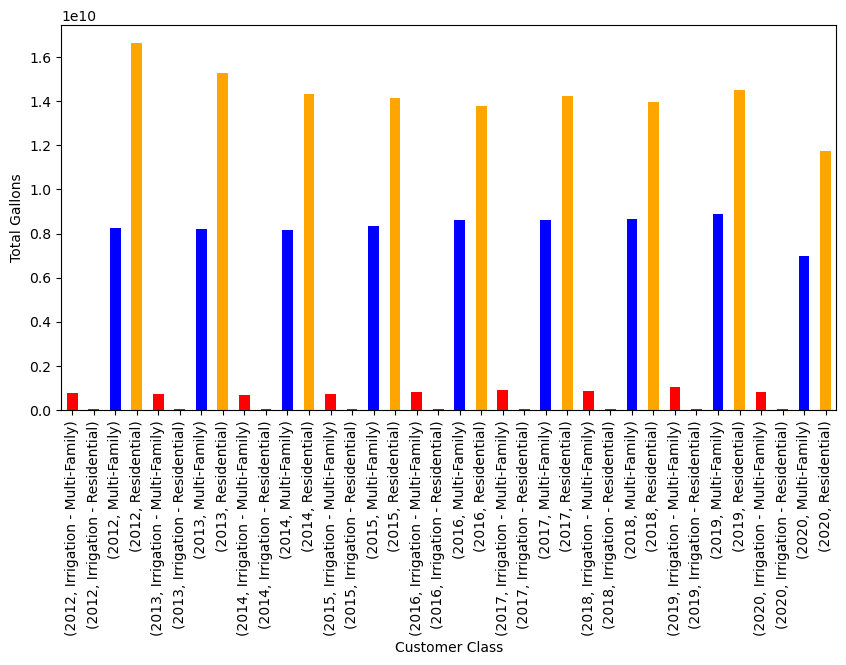

In [9]:

Custumer_class = water_complete_complete.groupby(['Year', 'Customer Class'])['Total Gallons'].sum()

# Create a bar plot using the  series
color_palette = ['red', 'green', 'blue', 'orange']
Custumer_class.plot(kind='bar', figsize=(10,5), stacked=False, color=color_palette)

# Set the title and axis labels
plt.xlabel('Customer Class')
plt.ylabel('Total Gallons')

# Display the plot
plt.show()